
## Mini-Project "UCI Adult (Income Prediction)"  
### Date: 19.4.2025  

<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Student Name</strong>: He Chun</li>
        <li><strong>Email</strong>: chunh@metropolia.fi</li>
        
  




In [2]:
# The goal is to predict whether annual income of an individual exceeds $50K/yr based on census data.

In [3]:
# Loading necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
# Read the column names from 'adult.names'

#with open('adult.names', 'r') as file:
#    content = file.read()

#print(content)

In [5]:
# Below code is to pre-check if the data has a column

#df = pd.read_csv('adult.data')
#df.head(5)

In [6]:
# Step 1
# Get the column names manually from 'adult.names' file.
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Load data
df = pd.read_csv('data/adult.data', names=column_names, sep=',', skipinitialspace=True) # using comma as separator and skipping spaces after commas

# Clean data (remove rows with '?')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Inspect
print("Dataset shape（Rows,Columns):", df.shape)  # Check the number of rows and columns in the dataset
df.head() # by default displays the first 5 rows 




Dataset shape（Rows,Columns): (30162, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
# Basic statistics
df.describe(include='all') # Generate summary statistics for all columns (numeric and categorical)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
# Step 2: Perform a Descriptive Summary

# Show the proportion of each income category
print("Proportion of income classes:")
print(df['income'].value_counts(normalize=True))  # Normalize=True shows percentages

# Show the top 5 most common education levels
print("\nTop 5 most common education levels:")
print(df['education'].value_counts().head())  # Displays top 5 education levels by frequency

# Show the average working hours per week grouped by income level
print("\nAverage hours per week by income:")
print(df.groupby('income')['hours-per-week'].mean())  # Group by 'income' and calculate mean


# Define a function to detect outliers using the IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile
    Q3 = data[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                     # Interquartile Range
    lower = Q1 - 1.5 * IQR            # Lower bound
    upper = Q3 + 1.5 * IQR            # Upper bound
    return data[(data[column] < lower) | (data[column] > upper)]  # Return rows outside bounds

# Apply the outlier function to 'hours-per-week'
outliers = find_outliers_iqr(df, 'hours-per-week')
print(f"\nOutliers in 'hours-per-week': {len(outliers)} rows")  #  7953/30162= 26.4% outliers in hours-per-week column

Proportion of income classes:
income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64

Top 5 most common education levels:
education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
Name: count, dtype: int64

Average hours per week by income:
income
<=50K    39.348592
>50K     45.706580
Name: hours-per-week, dtype: float64

Outliers in 'hours-per-week': 7953 rows


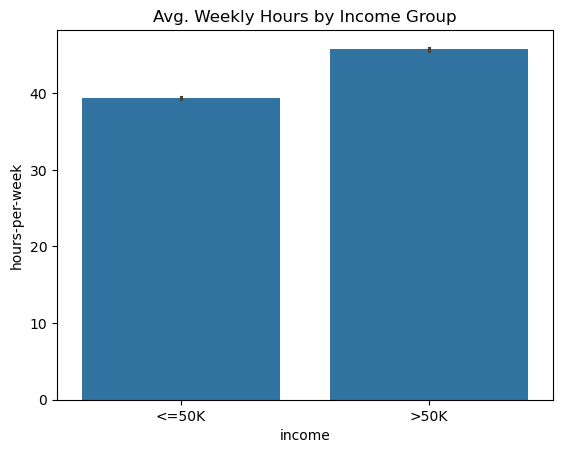

In [9]:
sns.barplot(data=df, x='income', y='hours-per-week')
plt.title("Avg. Weekly Hours by Income Group")
plt.show()

In [10]:
print("\nAverage hours per week by sex and income:")
print(df.groupby(['sex', 'income'])['hours-per-week'].mean())


Average hours per week by sex and income:
sex     income
Female  <=50K     36.423645
        >50K      40.897482
Male    <=50K     41.162042
        >50K      46.542683
Name: hours-per-week, dtype: float64


In [11]:
print("\nAverage age by education level:")
print(df.groupby('education')['age'].mean())


Average age by education level:
education
10th            37.897561
11th            32.363550
12th            32.013263
1st-4th         44.622517
5th-6th         41.649306
7th-8th         47.631957
9th             40.303297
Assoc-acdm      37.286706
Assoc-voc       38.246366
Bachelors       38.641554
Doctorate       47.130667
HS-grad         38.640955
Masters         43.740012
Preschool       41.288889
Prof-school     44.249077
Some-college    36.135370
Name: age, dtype: float64


In [12]:
print("\nAverage capital gain by occupation:")
print(df.groupby('occupation')['capital-gain'].mean().sort_values(ascending=False))


Average capital gain by occupation:
occupation
Prof-specialty       2717.880139
Exec-managerial      2185.330912
Sales                1308.637835
Protective-serv       713.596273
Tech-support          668.105263
Craft-repair          657.586849
Farming-fishing       592.707786
Transport-moving      498.121501
Adm-clerical          497.097286
Machine-op-inspct     323.825025
Priv-house-serv       291.594406
Handlers-cleaners     258.140000
Other-service         181.705479
Armed-Forces            0.000000
Name: capital-gain, dtype: float64


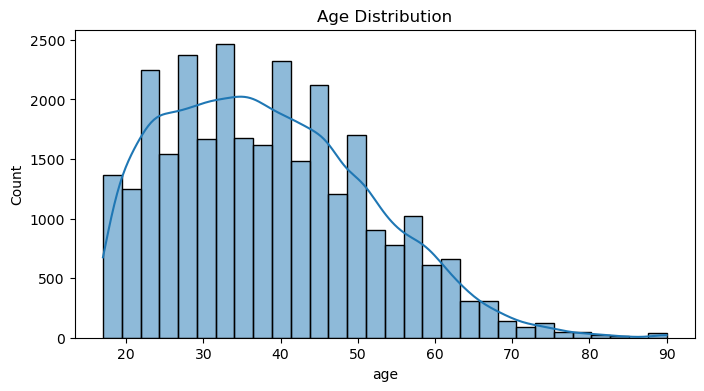

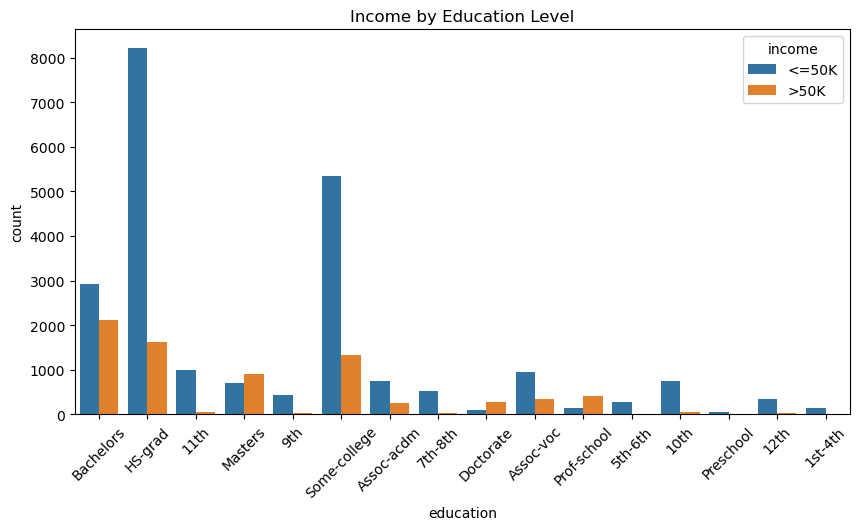

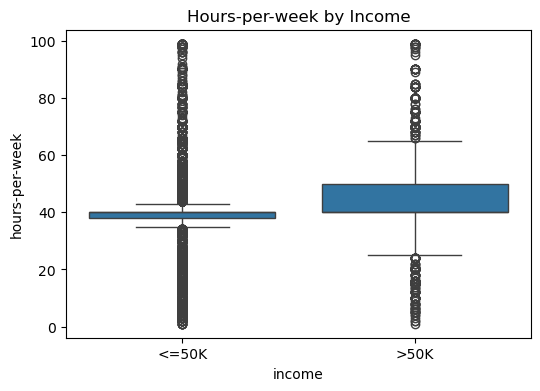

In [13]:
# Step 4: Visualize Data

# Distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Income vs Education
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.show()

# Hours-per-week by income
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours-per-week by Income')
plt.show()

In [14]:
# Step 5 (Optional): Predictive Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode categorical features
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Split features and target
X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=5000)  # 增加迭代次数
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4503
           1       0.74      0.46      0.57      1530

    accuracy                           0.82      6033
   macro avg       0.79      0.70      0.73      6033
weighted avg       0.81      0.82      0.81      6033



### Data Source Link: https://archive.ics.uci.edu/dataset/2/adult